# Kaggle: Airbnb New York City 2019

Sergi Sanz Orellana 1599507


# Introducción



### Explicación del dataset
El dataset utilizado se llama AB_NYC_2019.csv, contiene una buena cantidad de información sobre varios alojamientos que se encuentran en alquiler, en la plataforma de AIRBNB, de la ciudad de Nueva York. Con aproximadamente 50.000 alojamientos y 16 categorias de información por alojamiento.

## Análisis exploratorio de datos (EDA)

Librerias e importaciones para ejecutar este notebook:

In [286]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import preprocessing
from sklearn import metrics
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [287]:
dataset = pd.read_csv('AB_NYC_2019.csv')
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [288]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [289]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [290]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Limpiamos el dataset para no tener ningun Nand y eliminamos las columnas que no nos sirviran para nada.

In [291]:
dataset.drop('name', inplace=True, axis=1)
dataset.drop('host_name', inplace=True, axis=1)
dataset.drop('id', inplace=True, axis=1)
dataset.drop('last_review', inplace=True, axis=1)

dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)
dataset.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [292]:
dataset.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [293]:
dataset.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Ahora normalizamos las categorias para poder aplicar la matriz de correlación.

In [294]:
df = dataset

categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, drop='first')
data_encoded = encoder.fit_transform(df[categorical_cols])

df_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df, df_encoded], axis=1)

df = df.drop(columns=categorical_cols)

In [295]:
df.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2787,40.64749,-73.97237,149,1,9,0.21,6,365,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2845,40.75362,-73.98377,225,1,45,0.38,2,355,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4632,40.80902,-73.94190,150,3,0,0.00,1,365,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4869,40.68514,-73.95976,89,1,270,4.64,1,194,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7192,40.79851,-73.94399,80,10,9,0.10,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observamos que nos han salido más de 200 columnas porque el atributo neighbouhood tiene más de 200 atributos unicos.

In [296]:
dataset.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Eliminamos el atributo 'neighbourhood' ya que tenemos otro atributo 'neighbourhood_group' que nos dice dónde se encuentra el alojamiento, asi podemos simplificar la matriz de correlación sin perder información prácticamente.

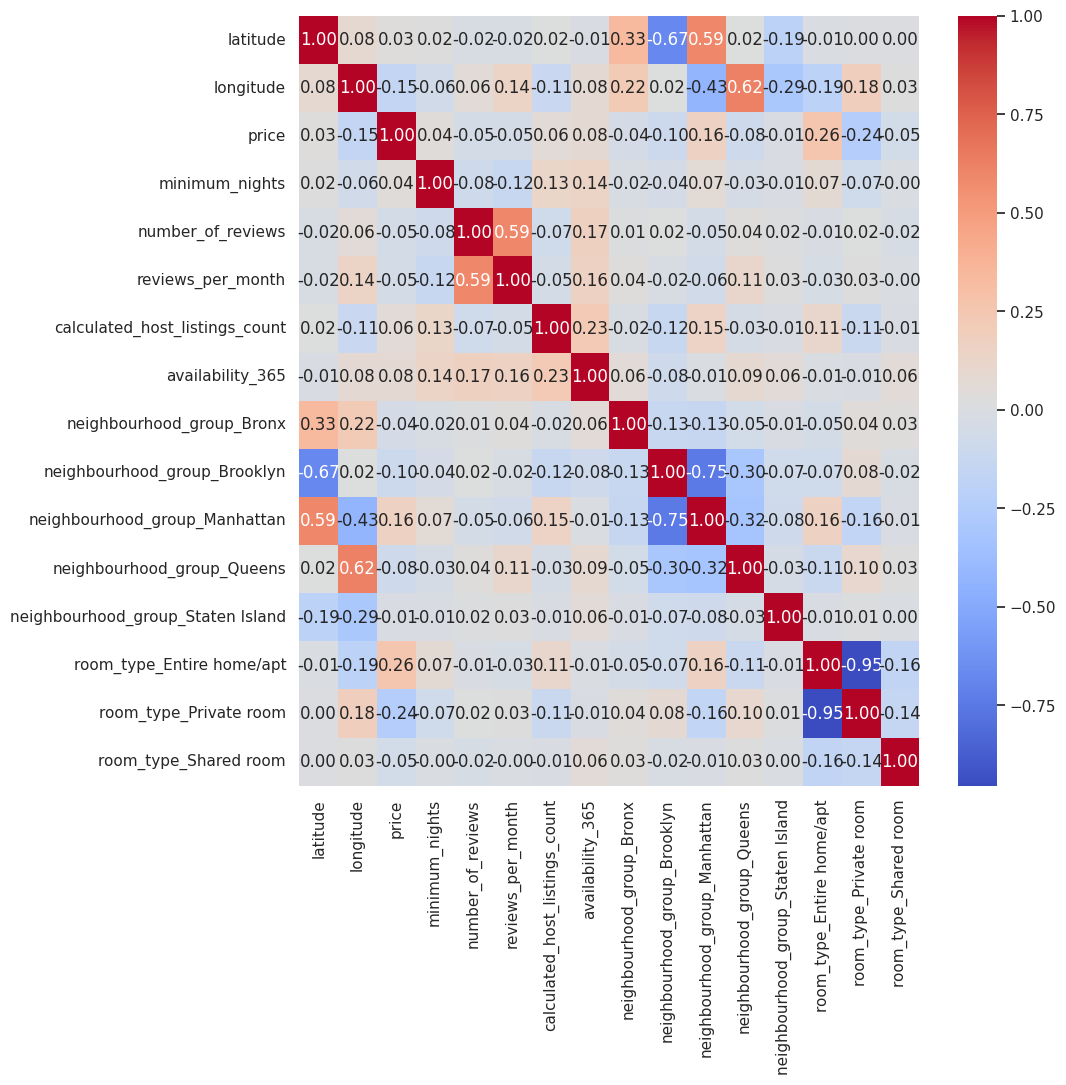

In [297]:
dataset = pd.read_csv('AB_NYC_2019.csv')

dataset.drop('name', inplace=True, axis=1)
dataset.drop('host_name', inplace=True, axis=1)
dataset.drop('id', inplace=True, axis=1)
dataset.drop('host_id', inplace=True, axis=1)
dataset.drop('last_review', inplace=True, axis=1)
dataset.drop('neighbourhood', inplace=True, axis=1)

dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)


df = dataset
categorical_cols = df.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(df[categorical_cols])
df_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(categorical_cols))

df = pd.concat([df, df_encoded], axis=1)
df = df.drop(columns=categorical_cols)

correlation_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

plt.show()

Observamos que el precio viene influido en más medida por el hecho de si el alojamiento es privado o no, donde se encuentra el alojamiento y por la longitud del mismo (coordenadas en la tierra, no distancia de largo).

In [298]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [299]:
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

## Objectivo

El Objetivo de esta práctica es predecir el precio del alojamiento segun sus características, por lo tanto estamos delante de un problema de regresión. Para ello crearé un modelo de regresión lineal capaz de ello.

Como hemos podido ver, dos de los factores más significativos para establecer el precio por noche de un alojamiento son:
- Dónde se encuentra el alojamiento?
  - 'neighbourhood_group_Bronx'
  - 'neighbourhood_group_Brooklyn'
  - 'neighbourhood_group_Manhattan'
  - 'neighbourhood_group_Queens'
  - 'neighbourhood_group_Staten Island'
- Coordenadas polares del alojamiento?
  - 'latitude'
  - 'longitude'
  

- Que tipo de alojamiento es?
  - 'room_type_Entire home/apt'
  - 'room_type_Private room'
  - 'room_type_Shared room'


In [300]:
lat = np.mean(dataset['latitude'])
lon = np.mean(dataset['longitude'])

fig = px.density_mapbox(dataset, lat='latitude', lon='longitude', z='price', radius=2, center=dict(lat = lat, lon = lon), zoom=11, mapbox_style="carto-positron", color_continuous_scale="Viridis")
fig.update_layout(title_text='Mapa de densidad segun precio', title_x=0.5)
fig.show()

<Axes: xlabel='price', ylabel='Count'>

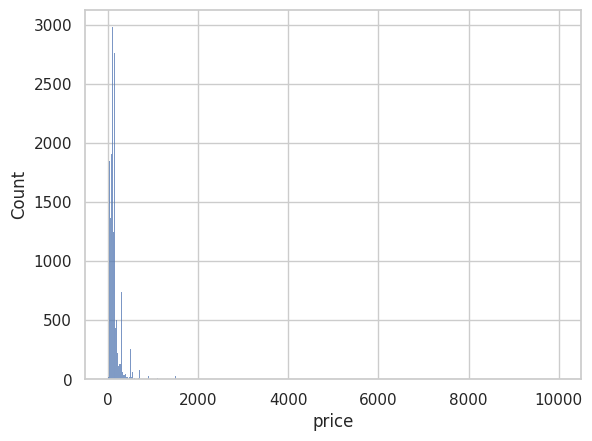

In [301]:
sns.histplot(df.price)

In [302]:
dataset.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<Axes: title={'center': 'Proporción de Alojamientos en los distritos'}>

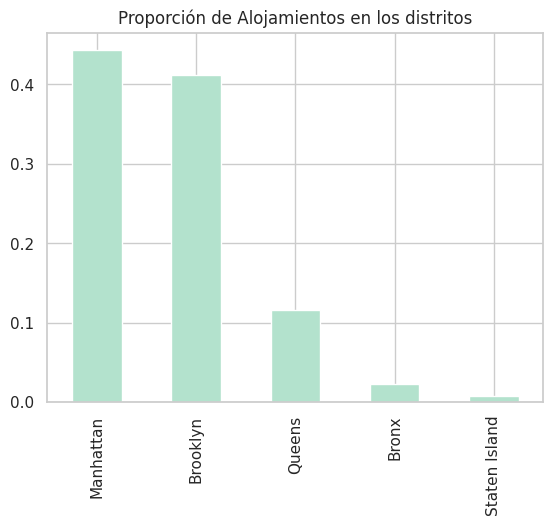

In [303]:
(dataset.neighbourhood_group.value_counts() / dataset.shape[0]).plot.bar(cmap='Pastel2', title='Proporción de Alojamientos en los distritos')

Vemos que la mayoria de alojamientos se encuentran en Manhattan 45% y Brooklyn 40%. Seguido de Queens con un 10%, Bronx y Staten Island llevandose un porcentaje muy bajo.

In [304]:
dataset.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<Axes: title={'center': 'Proporción de alojamientos por tipo de habitación'}>

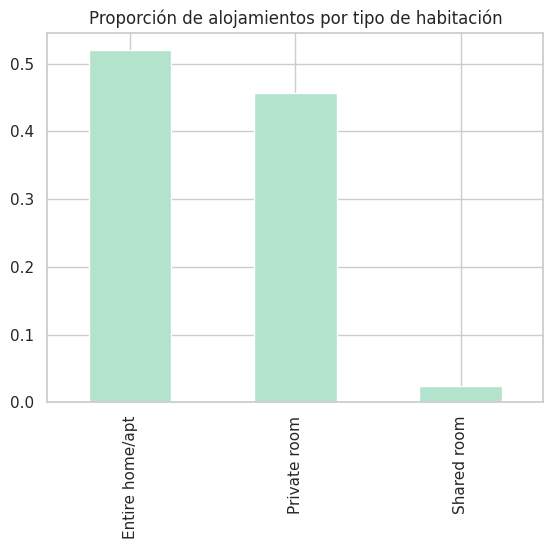

In [305]:
(dataset.room_type.value_counts() / dataset.shape[0]).plot.bar(cmap='Pastel2', title='Proporción de alojamientos por tipo de habitación')


Podemos observar que sobre los alojamientos totales, sobre el 50% son apartamentos enteros, sobre el 45% habitaciones privadas y el porcentaje restante  para las habitaciones compartidas.

In [306]:
# Media de precio por cada tipo de alojamiento
dataset.groupby("room_type").agg({"price":"mean"})

,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


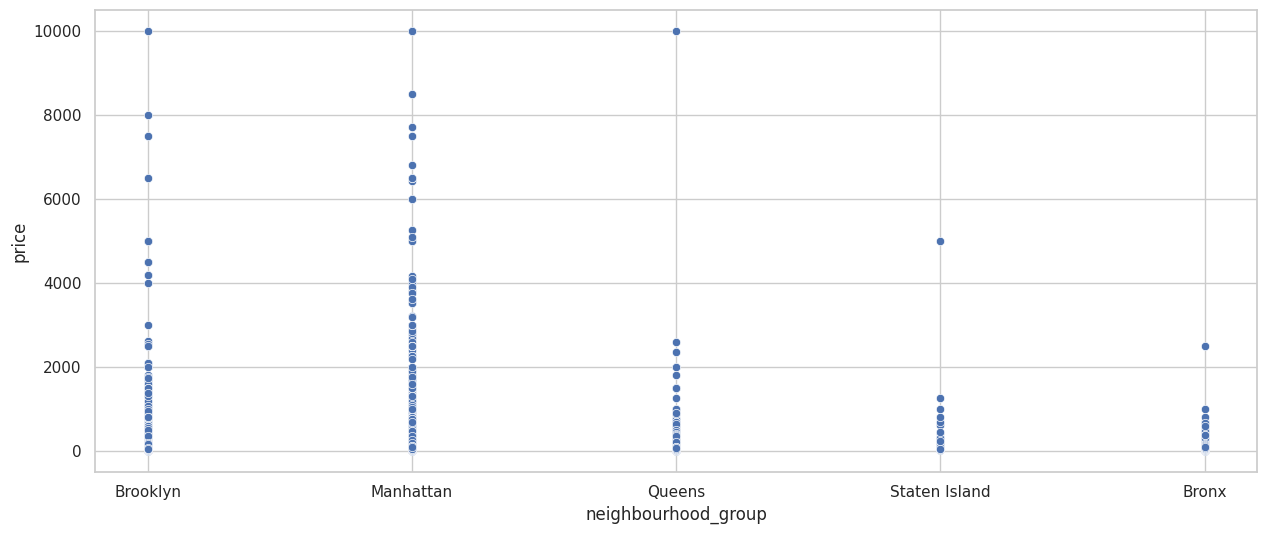

In [307]:
dataset = pd.read_csv('AB_NYC_2019.csv')
plt.figure(figsize=(15, 6))
sns.scatterplot(data=dataset,x="neighbourhood_group",y="price")
plt.show()

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   latitude                           48895 non-null  float64
 1   longitude                          48895 non-null  float64
 2   price                              48895 non-null  int64  
 3   minimum_nights                     48895 non-null  int64  
 4   number_of_reviews                  48895 non-null  int64  
 5   reviews_per_month                  48895 non-null  float64
 6   calculated_host_listings_count     48895 non-null  int64  
 7   availability_365                   48895 non-null  int64  
 8   neighbourhood_group_Bronx          48895 non-null  float64
 9   neighbourhood_group_Brooklyn       48895 non-null  float64
 10  neighbourhood_group_Manhattan      48895 non-null  float64
 11  neighbourhood_group_Queens         48895 non-null  flo

In [309]:
df.columns

Index(['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [310]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,40.80902,-73.94190,150,3,0,0.00,1,365,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [311]:
scaler = StandardScaler()

df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalizado.head()


,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,1.916250,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.040134,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,1.840275,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,1.916250,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-1.040134,1.090893,-0.155887
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451,0.617065,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,0.961415,-0.916680,-0.155887
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.856865,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887


# Modelos con todos los precios  

## Regresión Lineal


In [312]:
df_completo1=df

X = df_completo1.drop('price', axis=1)
y = df_completo1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_square = metrics.r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square:', r2_square)


results_rl_completo = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred})


MAE: 75.26664142888539
MSE: 55073.80448956787
RMSE: 234.67808693946665
R2 Square: 0.09970715625521764


## Regresión Lineal con Random Forest Regressor

In [313]:
df_completo2=df

X = df_completo2.drop(['price'], axis=1)
y = df_completo2['price']

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred1 = rf.predict(X_test)

mae = mean_absolute_error(y_test1, y_pred1)
mse = mean_squared_error(y_test1, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test1, y_pred1)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print('RMSE:', rmse)
print(f'R^2 Square: {r2}')

results_rf_completo = pd.DataFrame({'Real': y_test1.values, 'Predicted': y_pred1})




MAE: 65.64225251502197
MSE: 35541.350281858155
RMSE: 188.52413713330756
R^2 Square: 0.11998713723064869


# Modelos con precios < 200$

Tenemos muy malos resultados debido a que tenemos los precios de alojamiento muy mal distribuidos y tenemos muy pocos datos de entrenamiento para precios del alojamiento por encima de los 200 dolares. Eso hace que tengamos un r2-score tan bajo. Cerca del 80% del dataset esta por debajo de los 200$.

In [314]:
df_reduced = df.loc[(df['price'] < 200)]

In [315]:
(len(df_reduced) / len(df)) * 100

79.98772880662645

## Regresión lineal

In [316]:
df_precios_bajos1=df_reduced

X = df_precios_bajos1.drop('price', axis=1)
y = df_precios_bajos1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred_train=lin_reg.predict(X_train)
y_pred_test=lin_reg.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

mae = metrics.mean_absolute_error(y_test, y_pred_test)
mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))



print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Square train:', r2_train)
print('R2 Square test:', r2_test)


results_rl_reduced = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred_test})


MAE: 24.603645170517414
MSE: 977.1440674057714
RMSE: 31.259303693552923
R2 Square train: 0.4976381407685656
R2 Square test: 0.5115376272232446


## Regresión lineal con Random Forest

In [317]:
df_precios_bajos2=df_reduced

X = df_precios_bajos2.drop('price', axis=1)
y = df_precios_bajos2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred_train=rf.predict(X_train)
y_pred_test=rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print('RMSE:', rmse)
print('R2 Square train:', r2_train)
print('R2 Square test:', r2_test)



results_rf_reduced = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred_test})

MAE: 21.971591238387454
MSE: 839.3662154265745
RMSE: 28.971817606539194
R2 Square train: 0.9428930738794672
R2 Square test: 0.5743449867054478


Estem davant de un cas de overfitting, ja que en el train obtenim molt bon rendiment, però en el test no.


## Solucionar overfitting

In [318]:
alphas = np.arange (0,0.2,0.01)
r2_train_list = []
r2_test_list = []
for alpha in alphas:
  lass = Lasso(alpha = alpha)
  lass.fit(X_train,y_train)

  y_pred_train = lass.predict(X_train)
  y_pred_test = lass.predict(X_test)

  r2_train_list.append(r2_score(y_train,y_pred_train))
  r2_test_list.append(r2_score(y_test,y_pred_test))

<ipython-input-318-e3edaa00b71b>:6: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.331e+07, tolerance: 5.412e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.



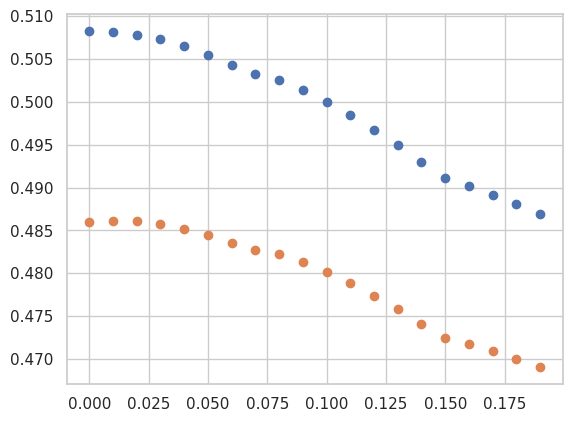

In [319]:
plt.scatter(alphas,r2_train_list)
plt.scatter(alphas,r2_test_list)
plt.show()

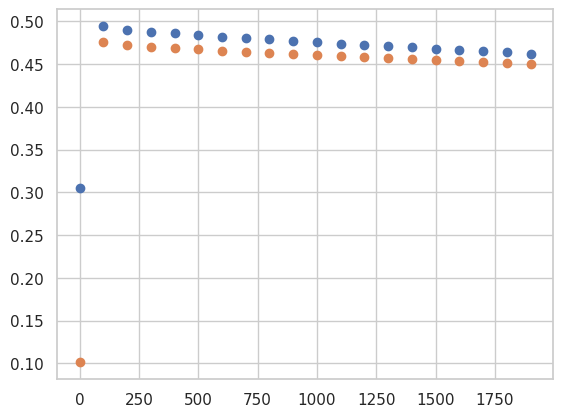

In [320]:
alphas = np.arange (0,2000,100)
r2_train_list = []
r2_test_list = []
for alpha in alphas:
  rid = Ridge(alpha = alpha)
  rid.fit(X_train,y_train)

  y_pred_train = rid.predict(X_train)
  y_pred_test = rid.predict(X_test)

  r2_train_list.append(r2_score(y_train,y_pred_train))
  r2_test_list.append(r2_score(y_test,y_pred_test))

plt.scatter(alphas,r2_train_list)
plt.scatter(alphas,r2_test_list)
plt.show()

In [321]:
target_att = 'price'
attributes = [k for k in df.keys() if k!= target_att and 'random' not in k]

X = df[attributes]
y = df[[target_att]]

In [322]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     410.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:47:53   Log-Likelihood:            -3.3485e+05
No. Observations:               48895   AIC:                         6.697e+05
Df Residuals:                   48881   BIC:                         6.699e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -1.819e+04   2099.938     -8.662      0.000   -2.23e+04   -1.41e+04
latitude                           -210.1460     31.396     -6.693      0.000    -271.683    -148.609
longitude                          -493.9965     36.143    -13.668      0.000    -564.837    -423.156
minimum_nights                       -0.0542      0.052     -1.046      0.296      -0.156       0.047
number_of_reviews                    -0.2435      0.029     -8.402      0.000      -0.300      -0.187
reviews_per_month                    -3.0326      0.815     -3.720      0.000      -4.630      -1.435
calculated_host_listings_count       -0.1740      0.033     -5.239      0.000      -0.239      -0.109
availability_365                      0.1963      0.008     23.231      0.000       0.180       0.213
neighbourhood_group_Bronx         -3605.7618    419.883     -8.588      0.000   -4428.738   -2782.786
neighbourhood_group_Brooklyn      -3639.7146    418.924     -8.688      0.000   -4460.810   -2818.619
neighbourhood_group_Manhattan     -3577.4613    421.167     -8.494      0.000   -4402.954   -2751.969
neighbourhood_group_Queens        -3610.3546    417.262     -8.652      0.000   -4428.193   -2792.516
neighbourhood_group_Staten Island -3757.2202    422.948     -8.883      0.000   -4586.204   -2928.236
room_type_Entire home/apt         -5980.7130    700.063     -8.543      0.000   -7352.845   -4608.581
room_type_Private room            -6086.7922    699.957     -8.696      0.000   -7458.716   -4714.869
room_type_Shared room             -6123.0073    699.943     -8.748      0.000   -7494.903   -4751.111
==============================================================================
Omnibus:                   110388.487   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        994749619.423
Skew:                          21.451   Prob(JB):                         0.00
Kurtosis:                     700.445   Cond. No.                     3.72e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [323]:
rf.feature_importances_

array([1.56774831e-01, 1.49055869e-01, 4.59082574e-02, 4.73344375e-02,
       6.14914992e-02, 2.78225540e-02, 6.43092078e-02, 3.80970517e-04,
       9.50491477e-04, 3.25232921e-02, 1.21675383e-03, 1.21682944e-04,
       4.04433420e-01, 4.18869815e-03, 3.48803530e-03])

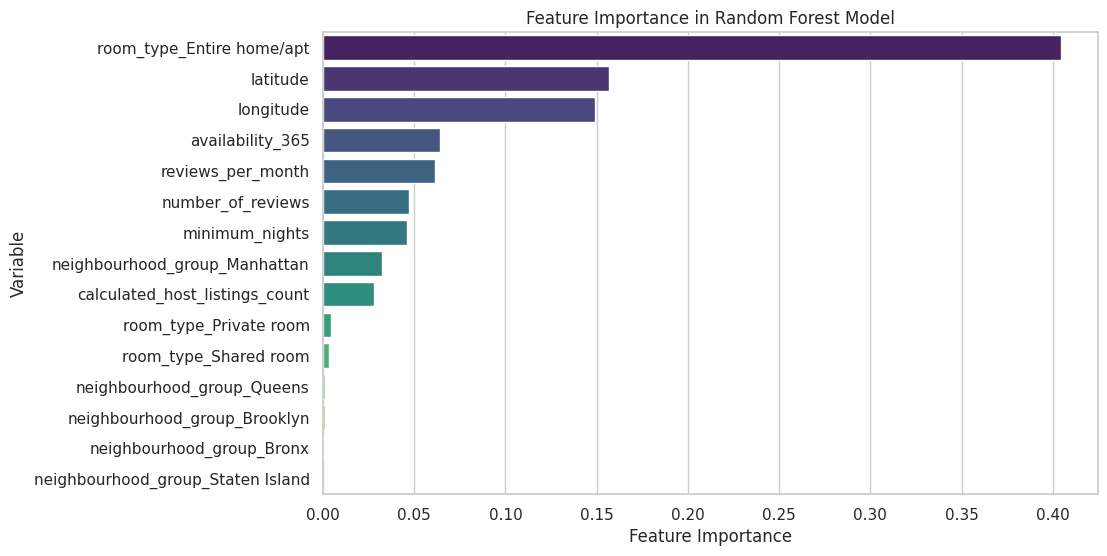

In [324]:
CoeffRM1 = pd.DataFrame(columns=["Variable","FeatureImportance"])
CoeffRM1["Variable"]=X_train.columns
CoeffRM1["FeatureImportance"]=rf.feature_importances_
CoeffRM1_sorted = CoeffRM1.sort_values("FeatureImportance", ascending=False)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x="FeatureImportance", y="Variable", data=CoeffRM1_sorted, palette="viridis")

# Añadir etiquetas y título
plt.xlabel("Feature Importance")
plt.ylabel("Variable")
plt.title("Feature Importance in Random Forest Model")

# Mostrar el gráfico
plt.show()

In [325]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [326]:
rf2 = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 5,min_samples_leaf =4)
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [327]:
print(rf2.score(X_train, y_train))
y_pred2= rf2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))


0.8315526440068833
28.702171502201008


## CrossValidation per mitigar overfitting

In [328]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
rm_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [329]:
print(rm_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 30, 50, 70, 90, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [330]:

# Use the random grid to search for best hyperparameters
#t1 = time.time()

#rf2 = RandomForestRegressor()

# Random search of parameters, using 2 fold cross validation,
# and use 100 iterations
#rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = rm_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
#rf2_random.fit(X_train, y_train)

#t2 =time.time()

#Dura més de 1h resultat son millors paramtres:
print("Millors parametres")
{'n_estimators': 800,
               'max_features': 'sqrt',
               'max_depth': 90,
               'min_samples_split': 5,
               'min_samples_leaf': 2,
               'bootstrap': True}


Millors parametres


{'n_estimators': 800,
 'max_features': 'sqrt',
 'max_depth': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'bootstrap': True}

In [331]:
'''
y_pred3 = rf2_random.predict(X_test)

y_pred_train=rf2_random.predict(X_train)
y_pred_test=rf2_random.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print('RMSE:', rmse)
print('R2 Square train:', r2_train)
print('R2 Square test:', r2_test)

results_rf_random = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred_test})
'''

"\ny_pred3 = rf2_random.predict(X_test)\n\ny_pred_train=rf2_random.predict(X_train)\ny_pred_test=rf2_random.predict(X_test)\n\nmae = mean_absolute_error(y_test, y_pred_test)\nmse = mean_squared_error(y_test, y_pred_test)\nrmse = np.sqrt(mse)\n\nr2_train = r2_score(y_train,y_pred_train)\nr2_test = r2_score(y_test,y_pred_test)\n\nprint(f'MAE: {mae}')\nprint(f'MSE: {mse}')\nprint('RMSE:', rmse)\nprint('R2 Square train:', r2_train)\nprint('R2 Square test:', r2_test)\n\nresults_rf_random = pd.DataFrame({'Real': y_test.values, 'Predicted': y_pred_test})\n"

# Predicciones del Modelo


### Prediciones con todos los precios

In [332]:
#Regresion lineal
results_rl_completo.head(10)

,Real,Predicted
0,99,74.949882
1,40,39.026046
2,149,159.904507
3,80,133.514608
4,95,203.727207
5,800,248.360715
6,300,162.104502
7,250,242.539226
8,150,192.102037
9,48,40.973950


In [333]:
#Random Forest
results_rf_completo.head(10)

,Real,Predicted
0,89,157.50
1,30,48.69
2,120,102.04
3,470,302.70
4,199,175.16
5,170,147.61
6,90,68.64
7,60,141.66
8,150,253.02
9,74,154.55


<ipython-input-334-e4489b791c97>:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



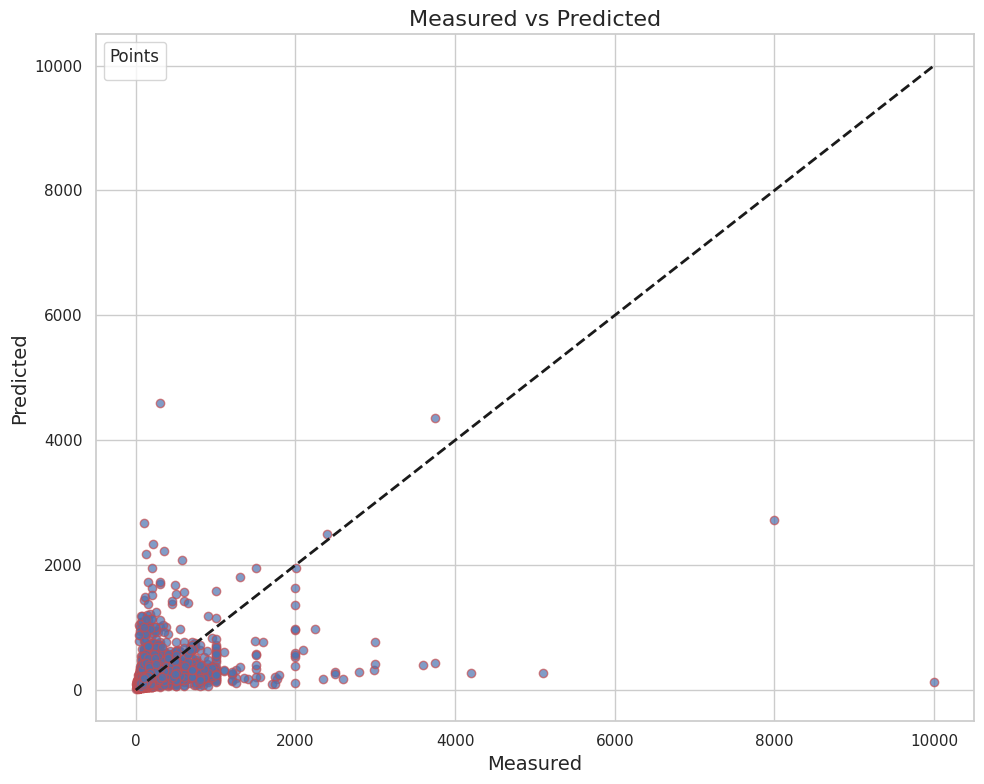

In [334]:
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(y_test1, y_pred1, alpha=0.7, edgecolors='r', cmap='coolwarm')
ax.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
ax.set_xlabel('Measured', fontsize=14)
ax.set_ylabel('Predicted', fontsize=14)
ax.set_title('Measured vs Predicted', fontsize=16)
ax.grid(True)
ax.legend(*scatter.legend_elements(), title="Points")
plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()



### Prediciones con precios < 250$

In [335]:
results_rl_reduced.tail(10)

,Real,Predicted
11723,116,129.117054
11724,100,108.075064
11725,100,74.199029
11726,80,81.262480
11727,119,89.831486
11728,90,101.910800
11729,110,148.797315
11730,145,135.740504
11731,99,121.606041
11732,53,80.860922


In [336]:
results_rf_reduced.tail(10)

,Real,Predicted
11723,50,74.26
11724,63,70.81
11725,80,81.93
11726,48,74.64
11727,80,69.19
11728,51,49.87
11729,81,76.26
11730,100,129.25
11731,48,58.70
11732,55,55.78


<ipython-input-337-9be945a41d5c>:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.



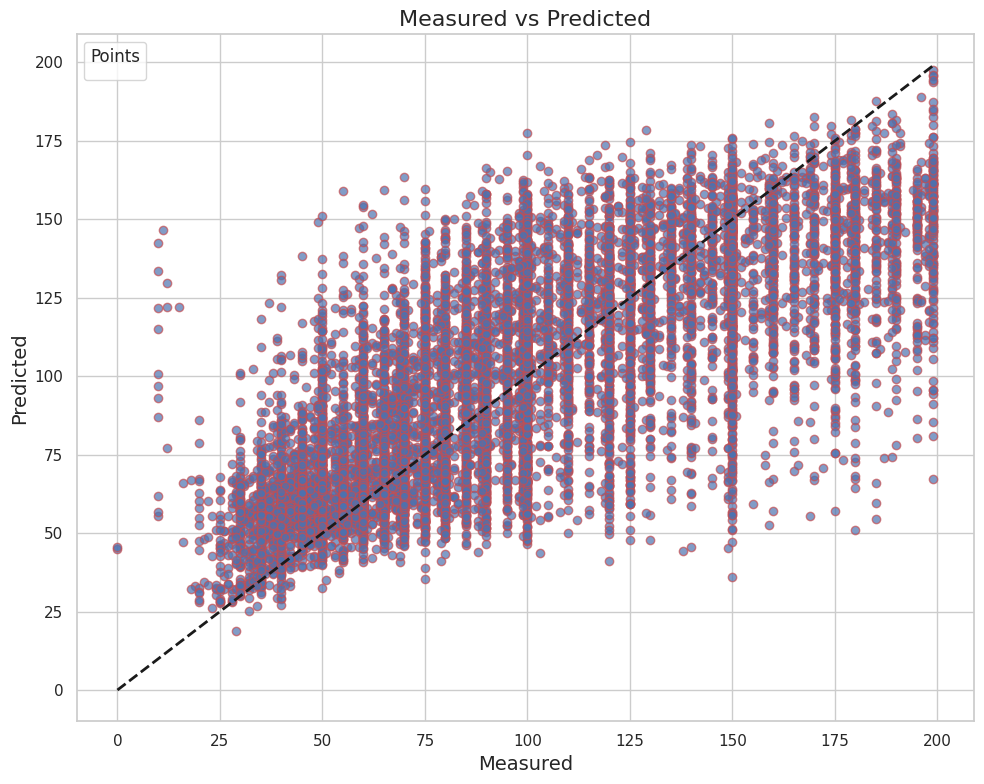

In [337]:
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(y_test, y_pred, alpha=0.7, edgecolors='r', cmap='coolwarm')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('Measured', fontsize=14)
ax.set_ylabel('Predicted', fontsize=14)
ax.set_title('Measured vs Predicted', fontsize=16)
ax.grid(True)
ax.legend(*scatter.legend_elements(), title="Points")
plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.show()


# Conclusiones


-- Los alojamientos de este dataset tienen grandes diferencias en los precios. Separar el conjunto de datos por el precio es útil para el análisis.

-- Los modelos de predicción de precios no han funcionando bien con todo el conjunto de precios. En cambio, aplicando una restriccion en el precio inferior a 200$ (80% del conjunto de datos) podemos considerar que nuestro modelo ha mejorado bastante, pese a no ser un resultado muy muy bueno.

- La mejor puntuación con el 100% de los datos ha sido de 0.12 de r^2 score.

- La mejor puntuación ha sido de un r^2 score de 0.56 para el random forest con el 80% del conjunto de datos, pero nos hemos encontrado en un caso de overfitting ya que en el train tenemos un r^2 score de 0,94.

- Finalmente, haciendo Cross Validation, hemos podido mitigar un poco el overfitting y pasar de un r^2 score train a 0.83 y un r^2 score test de 0.59.


-- Gracias a este análisis, hemos obtenido una comprensión más profunda de los factores clave que influyen en el precio de un alojamiento en NYC en la plataforma de Airbnb.


In [338]:
rmsedt = {"Model":["LR 100%","RF 100%","LR 80%","RF 80%","RF_Random 80%"],
          "RMSE":[234.67,188.52,31.25,28.97,28.36]}

rmsedf = pd.DataFrame(rmsedt)

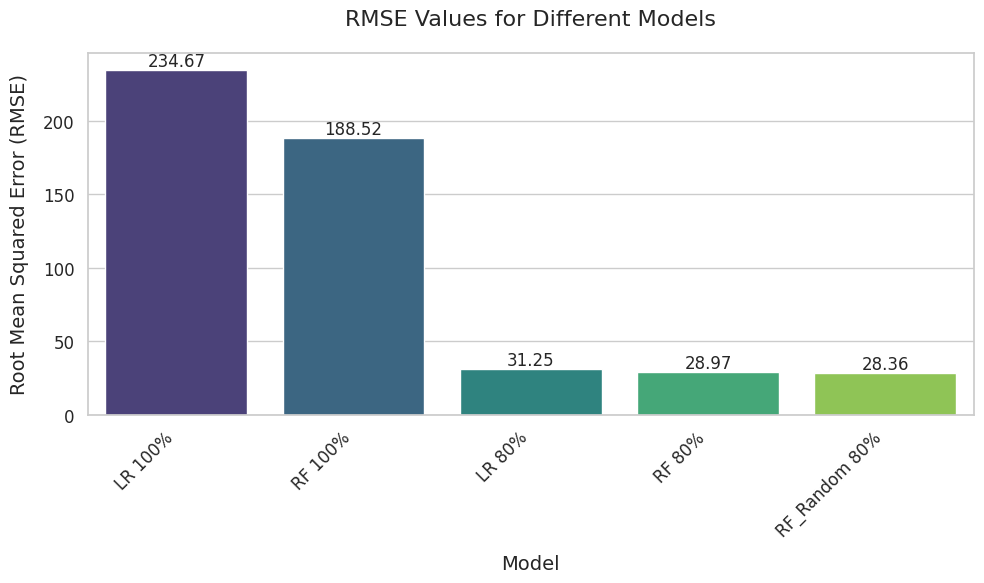

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Crear un gráfico de barras horizontal con un tamaño adecuado
plt.figure(figsize=(10, 6))

# Utilizar directamente sns.barplot para la gráfica de barras, intercambiando x e y
sns.barplot(x="Model", y="RMSE", data=rmsedf, palette="viridis")

# Añadir etiquetas y título con ajustes en el tamaño y estilo
plt.xlabel("Model", fontsize=14, labelpad=10)
plt.ylabel("Root Mean Squared Error (RMSE)", fontsize=14, labelpad=10)
plt.title("RMSE Values for Different Models", fontsize=16, pad=20)

# Añadir anotaciones en las barras para mostrar los valores exactos
for index, value in enumerate(rmsedf["RMSE"]):
    plt.text(index, value, f"{value:.2f}", ha="center", va="bottom", fontsize=12)

# Ajustar el espaciado entre las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [340]:
rsqdt = {"Model":["LR train 100%","RF train 100%","LR train 80%","LR test 80%","RF train 80%","RF test 80%","RF_Random train 80%","RF_Random test 80% "],
         "RSquared score":[0.0997,0.1199,0.4976,0.5115,0.9428,0.5743, 0.8317, 0.5919]}

rsqdt = pd.DataFrame(rsqdt)



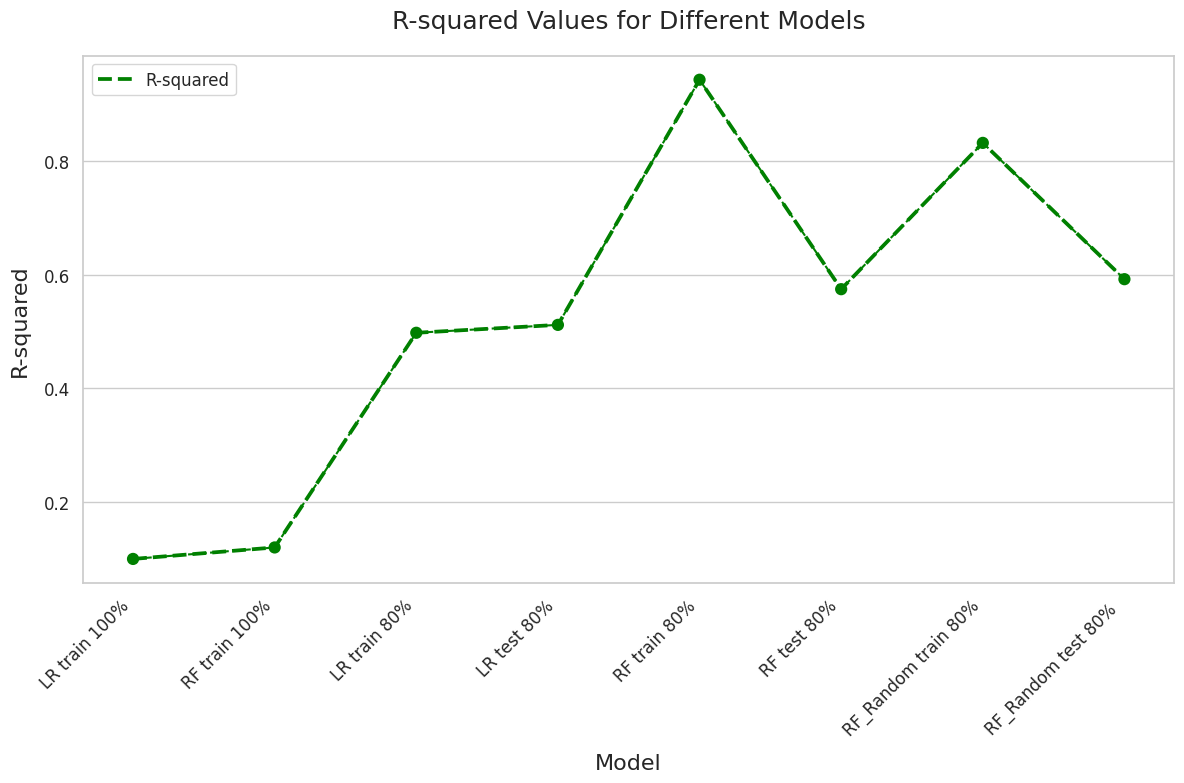

In [341]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Utilizar directamente sns.pointplot para evitar el uso de catplot
sns.pointplot(x="Model", y="RSquared score", color="green", markers="o", linestyles="--", data=rsqdt)

# Añadir líneas para conectar los puntos correspondientes
sns.lineplot(x="Model", y="RSquared score", color="green", data=rsqdt, linestyle="--", markers=False)

# Añadir etiquetas y título con ajustes en el tamaño y estilo
plt.xlabel("Model", fontsize=16, labelpad=10)
plt.ylabel("R-squared", fontsize=16, labelpad=10)
plt.title("R-squared Values for Different Models", fontsize=18, pad=20)

# Ajustar el espaciado entre las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# Añadir la leyenda
plt.legend(["R-squared"], loc="upper left", fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()
